## UM AMOC data loading and plotting with Iris

In [8]:
import os
import os.path
import glob

import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import iris.coord_categorisation as icc

In [2]:
TOP_LEVEL_DIRECTORY = "/gws/nopw/j04/eerie/public/derived_data"
model_resolution = "N640-ORCA12" # also N216-ORCA025
suiteid = "u-cx993" # also u-cy021
section = "rapid" # conservative temperature at surface

VARIABLES_MODEL = ['moc_model', 'moc_rapid', 'sf_model', 'sf_rapid', 'q_sum_model', 'q_sum_rapid', 'q_ot_model', 'q_ot_rapid', 'q_gyre_model', 'q_gyre_rapid', 'ekman', 'geoint', 'wbw', 'fc', 'umo', 'q_ek', 'q_fc', 'q_geoint', 't_basin', 's_basin']

DIR_STRUCTURE = "EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-{model_resolution}/eerie-piControl/r1i1p1f1/metric/{section}/gr1/v20230928"

In [3]:
def load_callback(cube, field, filename):
    """
    An Iris load callback function to delete a few metadata items that will
    prevent the files from being merged into a single cube.
    """
    attributes_to_remove = [
        "history"
    ]
    for attr_name in attributes_to_remove:
        del(cube.attributes[attr_name])

In [4]:
dir_variable = DIR_STRUCTURE.format(model_resolution=model_resolution, section=section)
search = os.path.join(TOP_LEVEL_DIRECTORY, dir_variable, 
    "metric_"+suiteid+"_at_"+section+"_18*.nc")
print(search)
rapid_paths = sorted(glob.glob(search))
#print('toscon_paths ',toscon_paths)

/gws/nopw/j04/eerie/public/derived_data/EERIE/EERIE/MOHC/HadGEM3-GC5-EERIE-N640-ORCA12/eerie-piControl/r1i1p1f1/metric/rapid/gr1/v20230928/metric_u-cx993_at_rapid_18*.nc


In [5]:
var = VARIABLES_MODEL[0]
cubes = iris.load(rapid_paths, var)
rapid = cubes.concatenate_cube()

/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 's_fc_fwt' invalid units 'PSU'
  warnings.warn(msg)
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 's_basin' invalid units 'PSU'
  warnings.warn(msg)
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'salt' invalid units 'PSU'
  warnings.warn(msg)
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 's_fc_fwt' invalid units 'PSU'
  warnings.warn(msg)
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 's_basin' invalid units 'PSU'
  warnings.warn(msg)
/opt/jaspy/lib/python3.10/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF

In [6]:
print(rapid)

moc_model / (Sv)                    (time: 108)
    Dimension coordinates:
        time                             x
    Attributes:
        code_reference              'https://github.com/NCAR/metric'
        comment                     'Time series of meridional overturning transport using model velocities...
        contact                     'fredc.ucar.edu'
        ekman_level                 50.0
        eos                         'teos10'
        geostrophic_method          'bottom-up'
        geostrophic_reference_level 4750.0
        maximum_longitude           -10.0
        method_references           '(1) McCarthy, G. D., and Coauthors, 2015: Measuring the Atlantic Meridional...
        minimum_longitude           -81.0
        reference_to_model_velocity 'None'
        rhocp                       4084625.0


We have now loaded the muliple netCDF files into a single Iris cube. We can now do something interesting with this loaded data.

### Plotting AMOC timeseries

Plot the first time point.

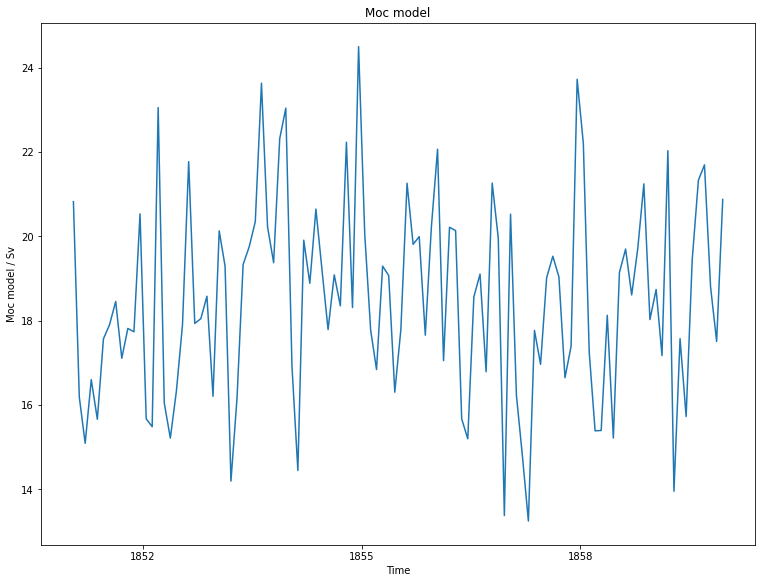

In [7]:
fig = plt.figure(figsize=[12.8, 9.6])
qplt.plot(rapid)
plt.draw()

### Time mean

Calculate the area weighted global mean at each time slice and plot this series.

In [12]:
# add a time coordinate year, and then mean over years (aggregated_by)
try:
    icc.add_year(rapid, "time", name = "year")
except:
    pass
rapid_annual = rapid.aggregated_by(
        ["year"], iris.analysis.MEAN
    )

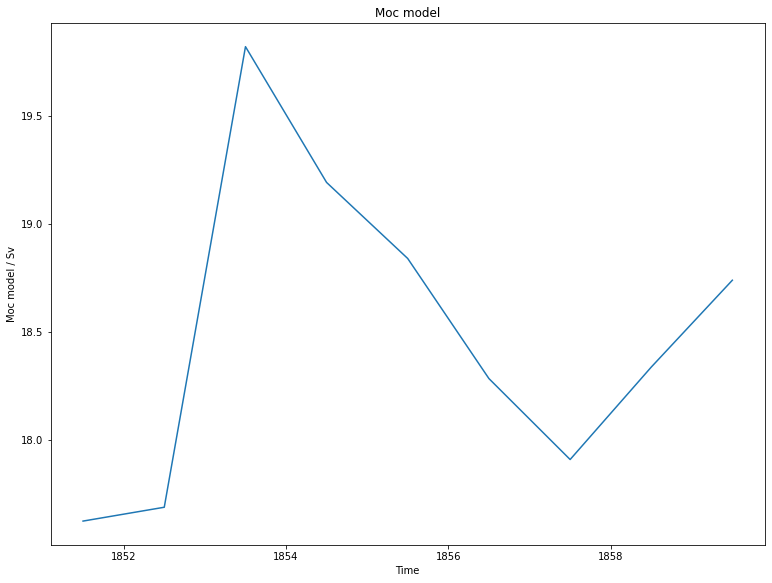

In [13]:
fig = plt.figure(figsize=[12.8, 9.6])
qplt.plot(rapid_annual)
plt.draw()

In [21]:
print(rapid_mean.summary(shorten=True))

moc_model / (Sv)                    (scalar cube)
